In [1]:
library(CellChat)
library(ggplot2)
setwd("/data/TAK_981")

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2



In [2]:
cellchat_list <- readRDS("h5ad/cellchat/individ_cellchat.RData")

In [3]:
cellchat_list

$cd40
An object of class CellChat created from a single dataset 
 22658 genes.
 34686 cells. 
CellChat analysis of single cell RNA-seq data! 

$combo
An object of class CellChat created from a single dataset 
 22658 genes.
 36079 cells. 
CellChat analysis of single cell RNA-seq data! 

$ctrl
An object of class CellChat created from a single dataset 
 22658 genes.
 27799 cells. 
CellChat analysis of single cell RNA-seq data! 

$tak
An object of class CellChat created from a single dataset 
 22658 genes.
 35554 cells. 
CellChat analysis of single cell RNA-seq data! 


In [4]:
cellchat <- mergeCellChat(cellchat_list, add.names = names(cellchat_list))

Merge the following slots: 'data.signaling','images','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.



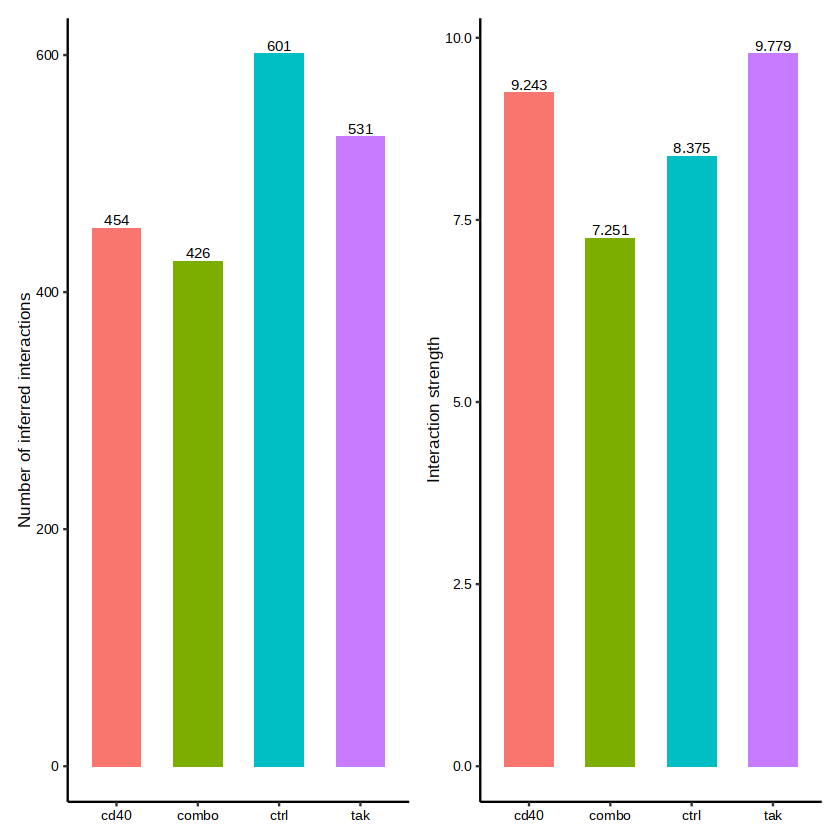

In [5]:
gg1 <- compareInteractions(cellchat, show.legend = F, group = c(1,2,3,4))
gg2 <- compareInteractions(cellchat, show.legend = F, group = c(1,2,3,4), measure = "weight")
gg1+gg2

In [8]:
comparisons = list(c(1,2), c(3,1), c(1,4), c(4,2), c(3,2), c(3,4))
names(comparisons) = list("CD40vCombo", "CtrlvCd40", "Cd40vtak", "takvcombo", "ctrlvcombo", "ctrlvtak")

In [24]:
for (x in 1:6) {
    dir=paste0("figs/cellchat/", names(comparisons[x]))
    dir.create(dir, showWarnings = FALSE)
    png(paste0(dir, "countsheatmap.png"))
    gg1 <- netVisual_heatmap(cellchat, comparison = comparisons[[x]], title.name=paste0(names(comparisons[x]), " counts"))
    ComplexHeatmap::draw(gg1, )
    dev.off()
    #> Do heatmap based on a merged object
    png(paste0(dir, "weightsheatmap.png"))
    gg1<-netVisual_heatmap(cellchat, measure = "weight", comparison = comparisons[[x]])
    ComplexHeatmap::draw(gg1)
    dev.off()
    png(paste0(dir, "counts_chordplot.png"))
    par(mfrow = c(1,1))
    netVisual_diffInteraction(cellchat, weight.scale = T, comparison = comparisons[[x]], title.name = paste0(names(comparisons[x]), " Counts"))
    dev.off()
    png(paste0(dir, "weights_chordplot.png"))
    par(mfrow = c(1,1))
    netVisual_diffInteraction(cellchat, weight.scale = T, comparison = comparisons[[x]], title.name = paste0(names(comparisons[x]), " weights"), measure="weight")
    dev.off()
    #gg1 <- rankNet(cellchat, mode = "comparison", measure = "weight", sources.use = NULL, targets.use = NULL, stacked = T, do.stat = TRUE, comparison = comparisons[[x]])
    #ggsave(paste0("figs/cellchat/", names(comparisons[x]), "_infoflow.png"))
    dir.create(paste0(dir, "/senders"), showWarnings = FALSE)
    dir.create(paste0(dir, "/recievers"), showWarnings = FALSE)
    dir.create(paste0(dir, "/diff"), showWarnings = FALSE)

    for (n in c("T-Cells", "Macrophages", "NK Cells", "Epithelial", "CD103+ cDC", "Granulocytes", "Fibroblasts")){
        send = paste0(dir, "/senders/", n)
        recieve = paste0(dir, "/recievers/", n)
        png(paste0(send, "_weights_chordplot.png"))
        netVisual_diffInteraction(cellchat, weight.scale = T, comparison = comparisons[[x]], sources.use=c(n), title.name = paste0(names(comparisons[x]), n, " sender weights"), measure="weight")
        dev.off()
        png(paste0(send, "_counts_chordplot.png"))
        netVisual_diffInteraction(cellchat, weight.scale = T, comparison = comparisons[[x]], sources.use=c(n), title.name = paste0(names(comparisons[x]), n, " sender counts"), measure="count")
        dev.off()
        png(paste0(recieve, "_weights_chordplot.png"))
        netVisual_diffInteraction(cellchat, weight.scale = T, comparison = comparisons[[x]], targets.use=c(n), title.name = paste0(names(comparisons[x]), n, " reciever weights"), measure="weight")
        dev.off()
        png(paste0(recieve, "_counts_chordplot.png"))
        netVisual_diffInteraction(cellchat, weight.scale = T, comparison = comparisons[[x]], targets.use=c(n), title.name = paste0(names(comparisons[x]), n, " reciever counts"), measure="count")
        dev.off()
        }
    diff=paste0(dir, "/diff/")
    for (n in c("T-Cells", "Epithelial", "Fibroblasts", "Granulocytes", "Macrophages")){
        gg1 <- rankNet(cellchat, mode = "comparison", measure = "weight", sources.use = c("Macrophages"), targets.use = c(n), stacked = T, do.stat = TRUE, comparison = comparisons[[x]])
        ggsave(paste0(diff, "Macrophages_to_", n, "_diff_weights.png"))
        gg1 <- rankNet(cellchat, mode = "comparison", measure = "weight", sources.use = c(n), targets.use = c("Macrophages"), stacked = T, do.stat = TRUE, comparison = comparisons[[x]])
        ggsave(paste0(diff, n, "_to_Macrophages", "_diff_weights.png"))
        gg1 <- rankNet(cellchat, mode = "comparison", measure = "count", sources.use = c("Macrophages"), targets.use = c(n), stacked = T, do.stat = TRUE, comparison = comparisons[[x]])
        ggsave(paste0(diff, "Macrophages_to_", n, "_diff_counts.png"))
        gg1 <- rankNet(cellchat, mode = "comparison", measure = "count", sources.use = c(n), targets.use = c("Macrophages"), stacked = T, do.stat = TRUE, comparison = comparisons[[x]])
        ggsave(paste0(diff, n, "_to_Macrophages", "_diff_counts.png"))

    }
}

Do heatmap based on a merged object 


Do heatmap based on a merged object 


Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Do heatmap based on a merged object 


Do heatmap based on a merged object 


Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7

In [72]:
for (n in c("T-Cells", "Macrophages", "NK Cells", "Epithelial", "CD103+ cDC", "Granulocytes", "Fibroblasts")){
    for (x in 1:6){
        gg1 <- rankNet(cellchat, mode = "comparison", measure = "weight", sources.use = c(n), stacked = T, do.stat = F, comparison = comparisons[[x]], return.data = F, signaling="TGFb")
        ggsave(paste0(n, "_", names(comparisons)[[x]], "_", "tgfb_sending.png"))
        gg1 <- rankNet(cellchat, mode = "comparison", measure = "weight", targets.use = c(n), stacked = T, do.stat = F, comparison = comparisons[[x]], return.data = F, signaling="TGFb")
        ggsave(paste0("figs/cellchat/tgfb/", n, "_", names(comparisons)[[x]], "_", "tgfb_recieving.png"))



    
}}

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 i

In [64]:
comparisons = list(c(1,2), c(3,1), c(1,4), c(4,2), c(3,2), c(3,4))
names(comparisons) = list("CD40vCombo", "CtrlvCd40", "Cd40vtak", "takvcombo", "ctrlvcombo", "ctrlvtak")
cd40vcombo <- rankNet(cellchat, mode = "comparison", measure = "weight", sources.use = c("Epithelial"), stacked = F, do.stat = TRUE, comparison = comparisons[[1]], return.data = T, signaling=c("TGFb"))[[1]] #%>% filter(name == "TGFb")
ctrlvcombo <- rankNet(cellchat, mode = "comparison", measure = "weight", sources.use = c("Epithelial"), targets.use = c("Macrophages"), stacked = T, do.stat = TRUE, comparison = comparisons[[5]], return.data = T, signaling=c("TGFb"))[[1]] #%>% filter(name == "TGFb")
takvcombo <- rankNet(cellchat, mode = "comparison", measure = "weight", sources.use = c("Macrophages"), stacked = T, do.stat = TRUE, comparison = comparisons[[4]], return.data = T, signaling=c("TGFb"))[[2]] #%>% filter(name == "TGFb")


,name,contribution,contribution.scaled,group,contribution.relative.1,pvalues
,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
TGFb,TGFb,0.009649372,0.2154772,cd40,0.4,0
TGFb1,TGFb,0.003465582,0.1765264,combo,0.4,0


In [6]:
rank_net <- function (object, slot.name = "netP", measure = c("weight", "count"), 
    mode = c("comparison", "single"), comparison = c(1, 2), color.use = NULL, 
    stacked = FALSE, sources.use = NULL, targets.use = NULL, 
    signaling = NULL, pairLR = NULL, signaling.type = NULL, do.stat = FALSE, 
    paired.test = TRUE, cutoff.pvalue = 0.05, tol = 0.05, thresh = 0.05, 
    show.raw = FALSE, return.data = FALSE, x.rotation = 90, title = NULL, 
    bar.w = 0.75, font.size = 8, do.flip = TRUE, x.angle = NULL, 
    y.angle = 0, x.hjust = 1, y.hjust = 1, axis.gap = FALSE, 
    ylim = NULL, segments = NULL, tick_width = NULL, rel_heights = c(0.9, 
        0, 0.1)) 
{
    measure <- match.arg(measure)
    mode <- match.arg(mode)
    options(warn = -1)
    object.names <- names(methods::slot(object, slot.name))
    if (measure == "weight") {
        ylabel = "Information flow"
    }
    else if (measure == "count") {
        ylabel = "Number of interactions"
    }
    if (mode == "single") {
        object1 <- methods::slot(object, slot.name)
        prob = object1$prob
        prob[object1$pval > thresh] <- 0
        if (measure == "count") {
            prob <- 1 * (prob > 0)
        }
        if (!is.null(sources.use)) {
            if (is.character(sources.use)) {
                if (all(sources.use %in% dimnames(prob)[[1]])) {
                  sources.use <- match(sources.use, dimnames(prob)[[1]])
                }
                else {
                  stop("The input `sources.use` should be cell group names or a numerical vector!")
                }
            }
            idx.t <- setdiff(1:nrow(prob), sources.use)
            prob[idx.t, , ] <- 0
        }
        if (!is.null(targets.use)) {
            if (is.character(targets.use)) {
                if (all(targets.use %in% dimnames(prob)[[1]])) {
                  targets.use <- match(targets.use, dimnames(prob)[[2]])
                }
                else {
                  stop("The input `targets.use` should be cell group names or a numerical vector!")
                }
            }
            idx.t <- setdiff(1:nrow(prob), targets.use)
            prob[, idx.t, ] <- 0
        }
        if (sum(prob) == 0) {
            stop("No inferred communications for the input!")
        }
        pSum <- apply(prob, 3, sum)
        pSum.original <- pSum
        if (measure == "weight") {
            pSum <- -1/log(pSum)
            pSum[is.na(pSum)] <- 0
            idx1 <- which(is.infinite(pSum) | pSum < 0)
            values.assign <- seq(max(pSum) * 1.1, max(pSum) * 
                1.5, length.out = length(idx1))
            position <- sort(pSum.original[idx1], index.return = TRUE)$ix
            pSum[idx1] <- values.assign[match(1:length(idx1), 
                position)]
        }
        else if (measure == "count") {
            pSum <- pSum.original
        }
        pair.name <- names(pSum)
        df <- data.frame(name = pair.name, contribution = pSum.original, 
            contribution.scaled = pSum, group = object.names[comparison[1]])
        idx <- with(df, order(df$contribution))
        df <- df[idx, ]
        df$name <- factor(df$name, levels = as.character(df$name))
        for (i in 1:length(pair.name)) {
            df.t <- df[df$name == pair.name[i], "contribution"]
            if (sum(df.t) == 0) {
                df <- df[-which(df$name == pair.name[i]), ]
            }
        }
        if (!is.null(signaling.type)) {
            LR <- subset(object@DB$interaction, annotation %in% 
                signaling.type)
            if (slot.name == "netP") {
                signaling <- unique(LR$pathway_name)
            }
            else if (slot.name == "net") {
                pairLR <- LR$interaction_name
            }
        }
        if ((slot.name == "netP") && (!is.null(signaling))) {
            df <- subset(df, name %in% signaling)
        }
        else if ((slot.name == "netP") && (!is.null(pairLR))) {
            stop("You need to set `slot.name == 'net'` if showing specific L-R pairs ")
        }
        if ((slot.name == "net") && (!is.null(pairLR))) {
            df <- subset(df, name %in% pairLR)
        }
        else if ((slot.name == "net") && (!is.null(signaling))) {
            stop("You need to set `slot.name == 'netP'` if showing specific signaling pathways ")
        }
        gg <- ggplot(df, aes(x = name, y = contribution.scaled)) + 
            geom_bar(stat = "identity", width = bar.w) + theme_classic() + 
            theme(axis.text = element_text(size = font.size), 
                axis.text.x = element_blank(), axis.ticks.x = element_blank(), 
                axis.title.y = element_text(size = 10)) + xlab("") + 
            ylab(ylabel) + coord_flip()
        if (!is.null(title)) {
            gg <- gg + ggtitle(title) + theme(plot.title = element_text(hjust = 0.5))
        }
    }
    else if (mode == "comparison") {
        prob.list <- list()
        pSum <- list()
        pSum.original <- list()
        pair.name <- list()
        idx <- list()
        pSum.original.all <- c()
        object.names.comparison <- c()
        for (i in 1:length(comparison)) {
            object.list <- methods::slot(object, slot.name)[[comparison[i]]]
            prob <- object.list$prob
            prob[object.list$pval > thresh] <- 0
            if (measure == "count") {
                prob <- 1 * (prob > 0)
            }
            if (!is.null(sources.use)) {
                if (is.character(sources.use)) {
                  if (all(sources.use %in% dimnames(prob)[[1]])) {
                    sources.use <- match(sources.use, dimnames(prob)[[1]])
                  }
                  else {
                    stop("The input `sources.use` should be cell group names or a numerical vector!")
                  }
                }
                idx.t <- setdiff(1:nrow(prob), sources.use)
                prob[idx.t, , ] <- 0
            }
            if (!is.null(targets.use)) {
                if (is.character(targets.use)) {
                  if (all(targets.use %in% dimnames(prob)[[1]])) {
                    targets.use <- match(targets.use, dimnames(prob)[[2]])
                  }
                  else {
                    stop("The input `targets.use` should be cell group names or a numerical vector!")
                  }
                }
                idx.t <- setdiff(1:nrow(prob), targets.use)
                prob[, idx.t, ] <- 0
            }
            if (sum(prob) == 0) {
                stop("No inferred communications for the input!")
            }
            prob.list[[i]] <- prob
            pSum.original[[i]] <- apply(prob, 3, sum)
            if (measure == "weight") {
                pSum[[i]] <- -1/log(pSum.original[[i]])
                pSum[[i]][is.na(pSum[[i]])] <- 0
                idx[[i]] <- which(is.infinite(pSum[[i]]) | pSum[[i]] < 
                  0)
                pSum.original.all <- c(pSum.original.all, pSum.original[[i]][idx[[i]]])
            }
            else if (measure == "count") {
                pSum[[i]] <- pSum.original[[i]]
            }
            pair.name[[i]] <- names(pSum.original[[i]])
            object.names.comparison <- c(object.names.comparison, 
                object.names[comparison[i]])
        }
        if (measure == "weight") {
            values.assign <- seq(max(unlist(pSum)) * 1.1, max(unlist(pSum)) * 
                1.5, length.out = length(unlist(idx)))
            position <- sort(pSum.original.all, index.return = TRUE)$ix
            for (i in 1:length(comparison)) {
                if (i == 1) {
                  pSum[[i]][idx[[i]]] <- values.assign[match(1:length(idx[[i]]), 
                    position)]
                }
                else {
                  pSum[[i]][idx[[i]]] <- values.assign[match(length(unlist(idx[1:i - 
                    1])) + 1:length(unlist(idx[1:i])), position)]
                }
            }
        }
        pair.name.all <- as.character(unique(unlist(pair.name)))
        df <- list()
        for (i in 1:length(comparison)) {
            df[[i]] <- data.frame(name = pair.name.all, contribution = 0, 
                contribution.scaled = 0, group = object.names[comparison[i]], 
                row.names = pair.name.all)
            df[[i]][pair.name[[i]], 3] <- pSum[[i]]
            df[[i]][pair.name[[i]], 2] <- pSum.original[[i]]
        }
        contribution.relative <- list()
        for (i in 1:(length(comparison) - 1)) {
            contribution.relative[[i]] <- as.numeric(format(df[[length(comparison) - 
                i + 1]]$contribution/df[[1]]$contribution, digits = 1))
            contribution.relative[[i]][is.na(contribution.relative[[i]])] <- 0
        }
        names(contribution.relative) <- paste0("contribution.relative.", 
            1:length(contribution.relative))
        for (i in 1:length(comparison)) {
            for (j in 1:length(contribution.relative)) {
                df[[i]][[names(contribution.relative)[j]]] <- contribution.relative[[j]]
            }
        }
        df[[1]]$contribution.data2 <- df[[length(comparison)]]$contribution
        if (length(comparison) == 2) {
            idx <- with(df[[1]], order(-contribution.relative.1, 
                contribution, -contribution.data2))
        }
        else if (length(comparison) == 3) {
            idx <- with(df[[1]], order(-contribution.relative.1, 
                -contribution.relative.2, contribution, -contribution.data2))
        }
        else if (length(comparison) == 4) {
            idx <- with(df[[1]], order(-contribution.relative.1, 
                -contribution.relative.2, -contribution.relative.3, 
                contribution, -contribution.data2))
        }
        else {
            idx <- with(df[[1]], order(-contribution.relative.1, 
                -contribution.relative.2, -contribution.relative.3, 
                -contribution.relative.4, contribution, -contribution.data2))
        }
        for (i in 1:length(comparison)) {
            df[[i]] <- df[[i]][idx, ]
            df[[i]]$name <- factor(df[[i]]$name, levels = as.character(df[[i]]$name))
        }
        df[[1]]$contribution.data2 <- NULL
        df <- do.call(rbind, df)
        df$group <- factor(df$group, levels = object.names.comparison)
        if (is.null(color.use)) {
            color.use = ggPalette(length(comparison))
        }
        df$group <- factor(df$group, levels = rev(levels(df$group)))
        color.use <- rev(color.use)
        if (do.stat & length(comparison) == 2) {
            for (i in 1:length(pair.name.all)) {
                if (nrow(prob.list[[j]]) != nrow(prob.list[[1]])) {
                  if (paired.test) {
                    stop("Paired test is not applicable to datasets with different cellular compositions! Please set `do.stat = FALSE` or `paired.test = FALSE`! \n")
                  }
                }
                prob.values <- matrix(0, nrow = nrow(prob.list[[1]]) * 
                  nrow(prob.list[[1]]), ncol = length(comparison))
                for (j in 1:length(comparison)) {
                  if (pair.name.all[i] %in% pair.name[[j]]) {
                    prob.values[, j] <- as.vector(prob.list[[j]][, 
                      , pair.name.all[i]])
                  }
                  else {
                    prob.values[, j] <- NA
                  }
                }
                prob.values <- prob.values[rowSums(prob.values, 
                  na.rm = TRUE) != 0, , drop = FALSE]
                if (nrow(prob.values) > 3 & sum(is.na(prob.values)) == 
                  0) {
                  pvalues <- wilcox.test(prob.values[, 1], prob.values[, 
                    2], paired = paired.test)$p.value                }
                else {
                  pvalues <- 0
                }
                pvalues[is.na(pvalues)] <- 0
                df$pvalues[df$name == pair.name.all[i]] <- pvalues
            }
            return(prob.values)
        }
        if (length(comparison) == 2) {
            if (do.stat) {
                colors.text <- ifelse((df$contribution.relative < 
                  1 - tol) & (df$pvalues < cutoff.pvalue), color.use[2], 
                  ifelse((df$contribution.relative > 1 + tol) & 
                    df$pvalues < cutoff.pvalue, color.use[1], 
                    "black"))
            }
            else {
                colors.text <- ifelse(df$contribution.relative < 
                  1 - tol, color.use[2], ifelse(df$contribution.relative > 
                  1 + tol, color.use[1], "black"))
            }
        }
        else {
            message("The text on the y-axis will not be colored for the number of compared datasets larger than 3!")
            colors.text = NULL
        }
        for (i in 1:length(pair.name.all)) {
            df.t <- df[df$name == pair.name.all[i], "contribution"]
            if (sum(df.t) == 0) {
                df <- df[-which(df$name == pair.name.all[i]), 
                  ]
            }
        }
        if ((slot.name == "netP") && (!is.null(signaling))) {
            df <- subset(df, name %in% signaling)
        }
        else if ((slot.name == "netP") && (!is.null(pairLR))) {
            stop("You need to set `slot.name == 'net'` if showing specific L-R pairs ")
        }
        if ((slot.name == "net") && (!is.null(pairLR))) {
            df <- subset(df, name %in% pairLR)
        }
        else if ((slot.name == "net") && (!is.null(signaling))) {
            stop("You need to set `slot.name == 'netP'` if showing specific signaling pathways ")
        }
        if (stacked) {
            gg <- ggplot(df, aes(x = name, y = contribution, 
                fill = group)) + geom_bar(stat = "identity", 
                width = bar.w, position = "fill")
            if (measure == "weight") {
                gg <- gg + xlab("") + ylab("Relative information flow")
            }
            else if (measure == "count") {
                gg <- gg + xlab("") + ylab("Relative number of interactions")
            }
            gg <- gg + geom_hline(yintercept = 0.5, linetype = "dashed", 
                color = "grey50", size = 0.5)
        }
        else {
            if (show.raw) {
                gg <- ggplot(df, aes(x = name, y = contribution, 
                  fill = group)) + geom_bar(stat = "identity", 
                  width = bar.w, position = position_dodge(0.8)) + 
                  xlab("") + ylab(ylabel)
            }
            else {
                gg <- ggplot(df, aes(x = name, y = contribution.scaled, 
                  fill = group)) + geom_bar(stat = "identity", 
                  width = bar.w, position = position_dodge(0.8)) + 
                  xlab("") + ylab(ylabel)
            }
            if (axis.gap) {
                gg <- gg + theme_bw() + theme(panel.grid = element_blank())
                gg.gap::gg.gap(gg, ylim = ylim, segments = segments, 
                  tick_width = tick_width, rel_heights = rel_heights)
            }
        }
        gg <- gg + CellChat_theme_opts() + theme_classic()
        if (do.flip) {
            gg <- gg + coord_flip() + theme(axis.text.y = element_text(colour = colors.text))
            if (is.null(x.angle)) {
                x.angle = 0
            }
        }
        else {
            if (is.null(x.angle)) {
                x.angle = 45
            }
            gg <- gg + scale_x_discrete(limits = rev) + theme(axis.text.x = element_text(colour = rev(colors.text)))
        }
        gg <- gg + theme(axis.text = element_text(size = font.size), 
            axis.title.y = element_text(size = font.size))
        gg <- gg + scale_fill_manual(name = "", values = color.use)
        gg <- gg + guides(fill = guide_legend(reverse = TRUE))
        gg <- gg + theme(axis.text.x = element_text(angle = x.angle, 
            hjust = x.hjust), axis.text.y = element_text(angle = y.angle, 
            hjust = y.hjust))
        if (!is.null(title)) {
            gg <- gg + ggtitle(title) + theme(plot.title = element_text(hjust = 0.5))
        }
    }
    if (return.data) {
        df$contribution <- abs(df$contribution)
        df$contribution.scaled <- abs(df$contribution.scaled)
        return(list(signaling.contribution = df, gg.obj = gg))
    }
    else {
        return(gg)
    }
}


In [51]:
rank_net(cellchat, mode = "comparison", measure = "weight", sources.use = c("Epithelial"), targets.use = c("Epithelial"), stacked = T, do.stat = TRUE, comparison = comparisons[[1]])

[,1] [,2]

In [17]:
comparisons = list(c(1,2), c(3,1), c(1,4), c(4,2), c(3,2), c(3,4))
names(comparisons) = list("CD40vCombo", "CtrlvCd40", "Cd40vtak", "takvcombo", "ctrlvcombo", "ctrlvtak")
for (n in c("Macrophages", "Fibroblasts", "Epithelial")){
    if (n != "Epithelial"){
    cd40vcombo <- rankNet(cellchat, mode = "comparison", measure = "weight", sources.use = c("Macrophages"), targets.use = c(n), stacked = T, do.stat = TRUE, comparison = comparisons[[1]], return.data = T, signaling=c("TGFb"))[[1]] #%>% filter(name == "TGFb")
    cd40vcombo$comp <- "cd40vcombo"
        }
    ctrlvcombo <- rankNet(cellchat, mode = "comparison", measure = "weight", sources.use = c("Macrophages"), targets.use = c(n), stacked = T, do.stat = TRUE, comparison = comparisons[[5]], return.data = T, signaling=c("TGFb"))[[1]] #%>% filter(name == "TGFb")
    ctrlvcombo$comp <- "ctrlvcombo"
    takvcombo <- rankNet(cellchat, mode = "comparison", measure = "weight", sources.use = c("Macrophages"), targets.use = c(n), stacked = T, do.stat = TRUE, comparison = comparisons[[4]], return.data = T, signaling=c("TGFb"))[[1]] #%>% filter(name == "TGFb")
    takvcombo$comp <- "takvcombo"
    test_df<-bind_rows(cd40vcombo, ctrlvcombo, takvcombo)
    test_df$color <- c(2,1)
    test_df$color <- as.factor(test_df$color)
    test_df
    color.use = NULL
    if (is.null(color.use)) {
            color.use = ggPalette(2)}
    tol<-0.05
    df<-test_df
    colors.text <- ifelse(df$contribution.relative < 
                    1 - tol, color.use[2], ifelse(df$contribution.relative > 
                    1 + tol, color.use[1], "black"))
    gg <- ggplot(df, aes(x = comp, y = contribution, 
                    fill = group)) + geom_bar(stat = "identity", 
                    width = 0.75, position = "fill")
    gg <- gg + CellChat_theme_opts() + theme_classic()
    gg <- gg + coord_flip() + theme(axis.text.y = element_text(colour = colors.text))
    gg
    file_name <- paste0("figs/cellchat/tgfb_comp/macro_", n, "_multicolor.png")
    ggsave(file_name)
    }

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


In [16]:
comparisons = list(c(1,2), c(3,1), c(1,4), c(4,2), c(3,2), c(3,4))
names(comparisons) = list("CD40vCombo", "CtrlvCd40", "Cd40vtak", "takvcombo", "ctrlvcombo", "ctrlvtak")
for (n in c("Macrophages", "Fibroblasts", "Epithelial")){
    if (n != "Epithelial"){
    cd40vcombo <- rankNet(cellchat, mode = "comparison", measure = "weight", sources.use = c("Fibroblasts"), targets.use = c(n), stacked = T, do.stat = F, comparison = comparisons[[1]], return.data = T, signaling=c("TGFb"))[[1]] #%>% filter(name == "TGFb")
    cd40vcombo$comp <- "cd40vcombo"
        }
    ctrlvcombo <- rankNet(cellchat, mode = "comparison", measure = "weight", sources.use = c("Fibroblasts"), targets.use = c(n), stacked = T, do.stat = F, comparison = comparisons[[5]], return.data = T, signaling=c("TGFb"))[[1]] #%>% filter(name == "TGFb")
    ctrlvcombo$comp <- "ctrlvcombo"
    takvcombo <- rankNet(cellchat, mode = "comparison", measure = "weight", sources.use = c("Fibroblasts"), targets.use = c(n), stacked = T, do.stat = F, comparison = comparisons[[4]], return.data = T, signaling=c("TGFb"))[[1]] #%>% filter(name == "TGFb")
    takvcombo$comp <- "takvcombo"
    test_df<-bind_rows(cd40vcombo, ctrlvcombo, takvcombo)
    test_df$color <- c(2,1)
    test_df$color <- as.factor(test_df$color)
    test_df
    color.use = NULL
    if (is.null(color.use)) {
            color.use = ggPalette(2)}
    tol<-0.05
    df<-test_df
    colors.text <- ifelse(df$contribution.relative < 
                    1 - tol, color.use[2], ifelse(df$contribution.relative > 
                    1 + tol, color.use[1], "black"))
    gg <- ggplot(df, aes(x = comp, y = contribution, 
                    fill = group)) + geom_bar(stat = "identity", 
                    width = 0.75, position = "fill")
    gg <- gg + CellChat_theme_opts() + theme_classic()
    gg <- gg + coord_flip() + theme(axis.text.y = element_text(colour = colors.text))
    gg
    file_name <- paste0("figs/cellchat/tgfb_comp/fibro_", n, "_multicolor.png")
    ggsave(file_name)
    }

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


In [18]:
comparisons = list(c(1,2), c(3,1), c(1,4), c(4,2), c(3,2), c(3,4))
names(comparisons) = list("CD40vCombo", "CtrlvCd40", "Cd40vtak", "takvcombo", "ctrlvcombo", "ctrlvtak")
for (n in c("Macrophages", "Fibroblasts", "Epithelial")){
    if (n != "Epithelial"){
    cd40vcombo <- rankNet(cellchat, mode = "comparison", measure = "weight", sources.use = c("Fibroblasts"), targets.use = c(n), stacked = T, do.stat = TRUE, comparison = comparisons[[1]], return.data = T, signaling=c("TGFb"))[[1]] #%>% filter(name == "TGFb")
    cd40vcombo$comp <- "cd40vcombo"
        }
    ctrlvcombo <- rankNet(cellchat, mode = "comparison", measure = "weight", sources.use = c("Fibroblasts"), targets.use = c(n), stacked = T, do.stat = TRUE, comparison = comparisons[[5]], return.data = T, signaling=c("TGFb"))[[1]] #%>% filter(name == "TGFb")
    ctrlvcombo$comp <- "ctrlvcombo"
    takvcombo <- rankNet(cellchat, mode = "comparison", measure = "weight", sources.use = c("Fibroblasts"), targets.use = c(n), stacked = T, do.stat = TRUE, comparison = comparisons[[4]], return.data = T, signaling=c("TGFb"))[[1]] #%>% filter(name == "TGFb")
    takvcombo$comp <- "takvcombo"
    test_df<-bind_rows(cd40vcombo, ctrlvcombo, takvcombo)
    test_df$color <- c(2,1)
    test_df$color <- as.factor(test_df$color)
    test_df
    color.use = NULL
    if (is.null(color.use)) {
            color.use = ggPalette(2)}
    tol<-0.05
    df<-test_df
    colors.text <- ifelse(df$contribution.relative < 
                    1 - tol, color.use[2], ifelse(df$contribution.relative > 
                    1 + tol, color.use[1], "black"))
    gg <- ggplot(df, aes(x = name, y = contribution.scaled, 
                  fill = group)) + geom_bar(stat = "identity", 
                  width = 0.75, position = position_dodge(0.8)) + 
                  xlab("") + ylab("Information Flow")
    gg <- gg + CellChat_theme_opts() + theme_classic()
    gg <- gg + coord_flip() + theme(axis.text.y = element_text(colour = colors.text))
    gg
    file_name <- paste0("figs/cellchat/tgfb_comp/fibro_", n, "_unstacked.png")
    ggsave(file_name)
    }

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


In [25]:
comparisons = list(c(1,2), c(3,1), c(1,4), c(4,2), c(3,2), c(3,4))
names(comparisons) = list("CD40vCombo", "CtrlvCd40", "Cd40vtak", "takvcombo", "ctrlvcombo", "ctrlvtak")
for (n in c("Macrophages", "Fibroblasts")){
    cd40vcombo <- rankNet(cellchat, mode = "comparison", measure = "weight", sources.use = c("Epithelial"), targets.use = c(n), stacked = T, do.stat = TRUE, comparison = comparisons[[1]], return.data = T, signaling=c("TGFb"))[[1]] #%>% filter(name == "TGFb")
    cd40vcombo$comp <- "cd40vcombo"
    ctrlvcombo <- rankNet(cellchat, mode = "comparison", measure = "weight", sources.use = c("Epithelial"), targets.use = c(n), stacked = T, do.stat = TRUE, comparison = comparisons[[5]], return.data = T, signaling=c("TGFb"))[[1]] #%>% filter(name == "TGFb")
    ctrlvcombo$comp <- "ctrlvcombo"
    takvcombo <- rankNet(cellchat, mode = "comparison", measure = "weight", sources.use = c("Epithelial"), targets.use = c(n), stacked = T, do.stat = TRUE, comparison = comparisons[[4]], return.data = T, signaling=c("TGFb"))[[1]] #%>% filter(name == "TGFb")
    takvcombo$comp <- "takvcombo"
    test_df<-bind_rows(cd40vcombo, ctrlvcombo, takvcombo)
    test_df$color <- c(2,1)
    test_df$color <- as.factor(test_df$color)
    test_df
    color.use = NULL
    if (is.null(color.use)) {
            color.use = ggPalette(2)}
    tol<-0.05
    df<-test_df
    colors.text <- ifelse(df$contribution.relative < 
                    1 - tol, color.use[2], ifelse(df$contribution.relative > 
                    1 + tol, color.use[1], "black"))
    gg <- ggplot(df, aes(x = comp, y = contribution, 
                    fill = group)) + geom_bar(stat = "identity", 
                    width = 0.75, position = "fill")
    gg <- gg + CellChat_theme_opts() + theme_classic()
    gg <- gg + coord_flip() + theme(axis.text.y = element_text(colour = colors.text))
    gg
    file_name <- paste0("figs/cellchat/tgfb_comp/Epithelial_", n, "_multicolor.png")
    ggsave(file_name)
    }

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


In [27]:
comparisons = list(c(1,2), c(3,1), c(1,4), c(4,2), c(3,2), c(3,4))
names(comparisons) = list("CD40vCombo", "CtrlvCd40", "Cd40vtak", "takvcombo", "ctrlvcombo", "ctrlvtak")
for (n in c("Macrophages", "Fibroblasts")){
    cd40vcombo <- rankNet(cellchat, mode = "comparison", measure = "weight", sources.use = c("Epithelial"), targets.use = c(n), stacked = T, do.stat = TRUE, comparison = comparisons[[1]], return.data = T, signaling=c("TGFb"))[[1]] #%>% filter(name == "TGFb")
    cd40vcombo$comp <- "cd40vcombo"
    ctrlvcombo <- rankNet(cellchat, mode = "comparison", measure = "weight", sources.use = c("Epithelial"), targets.use = c(n), stacked = T, do.stat = TRUE, comparison = comparisons[[5]], return.data = T, signaling=c("TGFb"))[[1]] #%>% filter(name == "TGFb")
    ctrlvcombo$comp <- "ctrlvcombo"
    takvcombo <- rankNet(cellchat, mode = "comparison", measure = "weight", sources.use = c("Epithelial"), targets.use = c(n), stacked = T, do.stat = TRUE, comparison = comparisons[[4]], return.data = T, signaling=c("TGFb"))[[1]] #%>% filter(name == "TGFb")
    takvcombo$comp <- "takvcombo"
    test_df<-bind_rows(cd40vcombo, ctrlvcombo, takvcombo)
    test_df$color <- c(2,1)
    test_df$color <- as.factor(test_df$color)
    test_df
    color.use = NULL
    if (is.null(color.use)) {
            color.use = ggPalette(2)}
    tol<-0.05
    df<-test_df
    gg <- ggplot(df, aes(x = name, y = contribution.scaled, 
                  fill = group)) + geom_bar(stat = "identity", 
                  width = 0.75, position = position_dodge(0.8)) + 
                  xlab("") + ylab("Information Flow")
    gg <- gg + CellChat_theme_opts() + theme_classic()
    gg <- gg + coord_flip() + theme(axis.text.y = element_text(colour = colors.text))
    gg
    file_name <- paste0("figs/cellchat/tgfb_comp/Epithelial_", n, "_unstacked.png")
    ggsave(file_name)
    }

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


In [29]:
comparisons = list(c(1,2), c(3,1), c(1,4), c(4,2), c(3,2), c(3,4))
names(comparisons) = list("CD40vCombo", "CtrlvCd40", "Cd40vtak", "takvcombo", "ctrlvcombo", "ctrlvtak")
for (n in c("Macrophages", "Fibroblasts", "Epithelial")){
    if (n != "Epithelial"){
    cd40vcombo <- rankNet(cellchat, mode = "comparison", measure = "weight", sources.use = c("Macrophages"), targets.use = c(n), stacked = T, do.stat = TRUE, comparison = comparisons[[1]], return.data = T, signaling=c("TGFb"))[[1]] #%>% filter(name == "TGFb")
    cd40vcombo$comp <- "cd40vcombo"
        }
    ctrlvcombo <- rankNet(cellchat, mode = "comparison", measure = "weight", sources.use = c("Macrophages"), targets.use = c(n), stacked = T, do.stat = TRUE, comparison = comparisons[[5]], return.data = T, signaling=c("TGFb"))[[1]] #%>% filter(name == "TGFb")
    ctrlvcombo$comp <- "ctrlvcombo"
    takvcombo <- rankNet(cellchat, mode = "comparison", measure = "weight", sources.use = c("Macrophages"), targets.use = c(n), stacked = T, do.stat = TRUE, comparison = comparisons[[4]], return.data = T, signaling=c("TGFb"))[[1]] #%>% filter(name == "TGFb")
    takvcombo$comp <- "takvcombo"
    test_df<-bind_rows(cd40vcombo, ctrlvcombo, takvcombo)
    test_df$color <- c(2,1)
    test_df$color <- as.factor(test_df$color)
    test_df
    color.use = NULL
    if (is.null(color.use)) {
            color.use = ggPalette(2)}
    tol<-0.05
    df<-test_df
    colors.text <- ifelse(df$contribution.relative < 
                    1 - tol, color.use[2], ifelse(df$contribution.relative > 
                    1 + tol, color.use[1], "black"))
    gg <- ggplot(df, aes(x = name, y = contribution.scaled, 
                  fill = group)) + geom_bar(stat = "identity", 
                  width = 0.75, position = position_dodge(0.8)) + 
                  xlab("") + ylab("Information Flow")
    gg <- gg + CellChat_theme_opts() + theme_classic()
    gg <- gg + coord_flip() + theme(axis.text.y = element_text(colour = colors.text))
    gg
    file_name <- paste0("figs/cellchat/tgfb_comp/macro_", n, "_unstacked.png")
    ggsave(file_name)
    }

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
